# Dependancies:

In [2]:
import os
from sys import exit, exc_info, argv
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip3 install git+https://github.com/slremy/netsapi --user --upgrade

from netsapi.challenge import *
# For a given environment, evaluate a policy by applying its evaluateReward method


  Cloning https://github.com/slremy/netsapi to /private/var/folders/nh/8jkcnd190cd60q13l2ds0gh40000gn/T/pip-req-build-yl2dpl_j
  Stored in directory: /private/var/folders/nh/8jkcnd190cd60q13l2ds0gh40000gn/T/pip-ephem-wheel-cache-33658y6h/wheels/9e/73/c9/86a9cc2460e11b3ce5b0a5ebd2d9d332a68afe0941659967fa
Successfully built netsapi
  Found existing installation: netsapi 1.2
    Uninstalling netsapi-1.2:
      Successfully uninstalled netsapi-1.2


# TRY

In [19]:
import matplotlib.pyplot as plt
#envSeqDec = ChallengeProveEnvironment()
res_10actions = []
for _ in range(10):
    envSeqDec = ChallengeProveEnvironment()
    reward_tmp1 = envSeqDec.evaluateAction([0.2, 0.9])
    print(reward_tmp1)
    #reward_tmp2 = envSeqDec.evaluateAction([1.0, 0.0])
    #print(reward_tmp2)
   # res_10actions.append(reward_tmp)
#x = list(range(len(res_10actions)))
#plt.plot(x, res_10actions)

105  Evaluations Remaining
(2, 272.43667380480696, False, {})
105  Evaluations Remaining
(2, 296.3644654760208, False, {})
105  Evaluations Remaining
(2, 280.27548040456634, False, {})
105  Evaluations Remaining
(2, 295.9580297254214, False, {})
105  Evaluations Remaining
(2, 295.4308105453094, False, {})
105  Evaluations Remaining
(2, 287.71401612459584, False, {})
105  Evaluations Remaining
(2, 297.68126861819263, False, {})
105  Evaluations Remaining
(2, 288.3570969324958, False, {})
105  Evaluations Remaining
(2, 281.1158180617316, False, {})
105  Evaluations Remaining
(2, 290.2942643375227, False, {})


In [8]:
res_10actions

[(2, 290.4741254128908, False, {}),
 (2, 286.2680531505536, False, {}),
 (2, 294.8703439513799, False, {}),
 (2, 285.8562598405139, False, {}),
 (2, 292.6327790747503, False, {}),
 (2, 282.1072335367209, False, {}),
 (2, 291.11003327475294, False, {}),
 (2, 300.56140168029685, False, {}),
 (2, 302.8071351261816, False, {}),
 (2, 290.6574317035325, False, {})]

In [20]:

elite = {'1': [1, 0], '2': [0, 1], '3': [1, 1], '4': [1, 0], '5': [0.5, 1]}
elite_ = {'1': [0, 1], '2': [1, 0], '3': [0, 1], '4': [1, 0], '5': [1, 1]}
elite3_ = {'1': [0, 1], '2': [1, 0], '3': [0, 1], '4': [1, 0], '5': [0, 1]}
x = 1
elite3 = {'1': [1-x, x], '2': [x, 1-x], '3': [1-x, x], '4': [x, 1-x], '5': [1-x, x]}
elite4_ = {'1': [0, 0.8], '2': [1, 0], '3': [0.6, 1], '4': [0, 0.8], '5': [1, 0]}
elite4 = {'2': [0, 0.8], '1': [1, 0], '4': [0, 0.8], '3': [1, 0], '5': [1, 0]}
res_10 = []
for i in range(10):
    envSeqDec = ChallengeProveEnvironment()
    reward= envSeqDec.evaluatePolicy(elite4_)
    print(reward)
    res_10.append(reward)
    


105  Evaluations Remaining
-44.16641575980237
105  Evaluations Remaining
-29.5382299900091
105  Evaluations Remaining
-68.68960731988375
105  Evaluations Remaining
-29.224154381016426
105  Evaluations Remaining
0.3406636662952316
105  Evaluations Remaining
-39.77147229289966
105  Evaluations Remaining
6.058893579697411
105  Evaluations Remaining
-58.00856161134661
105  Evaluations Remaining
-36.9698420634421
105  Evaluations Remaining
-48.53118453812405


# GA PART

### 1. Import

In [2]:
#!pip install gaft
from gaft import GAEngine
from gaft.components import BinaryIndividual, Population, DecimalIndividual, OrderIndividual
from gaft.operators import RouletteWheelSelection, UniformCrossover, FlipBitMutation, ExponentialRankingSelection
#Analysis plugin base class.
from gaft.plugin_interfaces.analysis import OnTheFlyAnalysis

import math
from random import random, uniform


##### Parameters

In [4]:
eps = 0.5
pop_size = 10
cross_prob = 0.4
exchange_prob = 0.5
mutation_pob = 0.5
generation = 10

### 2. Define population

In [5]:
indv_template = OrderIndividual(ranges=[(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1),(0, 1), (0, 1)], eps=eps, actions = [(1,1)])
population = Population(indv_template=indv_template, size = pop_size)
population.init()  # Initialize population with individuals.

NameError: name 'OrderIndividual' is not defined

### 3. Create genetic operators

In [8]:
# Use built-in operators here.
selection = RouletteWheelSelection()
crossover = UniformCrossover(pc=cross_prob, pe=exchange_prob) # PE = Gene exchange probability
mutation = FlipBitMutation(pm=mutation_pob) # 0.1 todo The probability of mutation

### 4. Create genetic algorithm engine to run optimization

In [9]:
engine = GAEngine(population=population, selection=selection,
                  crossover=crossover, mutation=mutation,)
                 # analysis=[FitnessStore])
    

### 5. Define and register fitness function

In [222]:
policy = policies[0]
@engine.fitness_register
#@engine.dynamic_linear_scaling(target='max', ksi0=2, r=0.9)
def fitness(indv):
    p = [0 for _ in range(10)]
    p = indv.solution
    policy = {'1': [p[0], p[1]], '2': [p[2], p[3]], '3': [p[4], p[5]], '4': [p[6], p[7]], '5': [p[8], p[9]]}
    reward = envSeqDec.evaluatePolicy(policy) # Action in Year 1 only
    print('Sequential Result : ', reward)
    tmp_reward.append(reward)
    tmp_policy.append(policy)
    tmp_single = []
#     for i in range(5):
#         tmp_single.append(env.evaluateReward(np.asarray(policy[str(i + 1)])))
#         print('Reward of point', str(i), ' : ', tmp_single[i])
#     print('Sum of single point : ', sum(tmp_single)) 
#    NEW.append(sum(tmp))
    return reward

In [186]:
@engine.analysis_register
class ConsoleOutput(OnTheFlyAnalysis):
    master_only = True
    interval = 1
    def register_step(self, g, population, engine):
        best_indv = population.best_indv(engine.fitness)
        msg = 'Generation: {}, best fitness: {:.3f}'.format(g + 1, engine.fmax)
        best_reward = max(tmp_reward[g : g + pop_size * generation])
        REWARDS.append(best_reward)
        #best_policy = POLICY[tmp_reward.index(best_reward)]
        #POLICY.append(best_policy)
        engine.logger.info(msg)

In [14]:
import random
envSeqDec = ChallengeSeqDecEnvironment(experimentCount = 20000) # Initialise a New Challenge Environment to post entire policy
env = ChallengeEnvironment(experimentCount = 20000)
eps = 1 # equal to actions space resolution # range/eps
pop_size = 4
cross_prob = 1
exchange_prob = 1
mutation_pob = 1
generation = 4
REWARDS = []
NEW = []
POLICY = []
tmp_reward = []
tmp_policy = []

random.seed(54)

raodong = 5
elite_ = {'1': [1, 1], '2': [1, 1], '3': [1, 1], '4': [1, 1], '5': [1, 1]}
#bodong = envSeqDec.evaluatePolicy(elite_)


# 2. Define population
indv_template = OrderIndividual(ranges=[(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1),(0, 1), (0, 1)], eps=eps, actions = [(1,1)])
population = Population(indv_template=indv_template, size = pop_size)
population.init()  # Initialize population with individuals.

# 3. Create genetic operators

# Use built-in operators here.
selection = RouletteWheelSelection()
crossover = UniformCrossover(pc=cross_prob, pe=exchange_prob) # PE = Gene exchange probability
mutation = FlipBitMutation(pm=mutation_pob) # 0.1 todo The probability of mutation

# 4. Create genetic algorithm engine to run optimization

engine = GAEngine(population=population, selection=selection,
                  crossover=crossover, mutation=mutation,)
                 # analysis=[FitnessStore])
    
    
# 5. Define and register fitness function   
@engine.fitness_register
#@engine.dynamic_linear_scaling(target='max', ksi0=2, r=0.9)

def fitness(indv):
    p = [0 for _ in range(10)]
    p = indv.solution
    policy = {'1': [p[0], p[1]], '2': [p[2], p[3]], '3': [p[4], p[5]], '4': [p[6], p[7]], '5': [p[8], p[9]]}
    reward = envSeqDec.evaluatePolicy(policy) # Action in Year 1 only
    print('Sequential Result : ', reward)
    tmp_reward.append(reward)
    tmp_policy.append(policy)
    #tmp_single = []
#     for i in range(5):
#         tmp_single.append(env.evaluateReward(np.asarray(policy[str(i + 1)])))
#         print('Reward of point', str(i), ' : ', tmp_single[i])
#     print('Sum of single point : ', sum(tmp_single)) 
#    NEW.append(sum(tmp))
    return reward + uniform(-raodong,raodong) 

@engine.analysis_register
class ConsoleOutput(OnTheFlyAnalysis):
    master_only = True
    interval = 1
    def register_step(self, g, population, engine):
        best_indv = population.best_indv(engine.fitness)
        msg = 'Generation: {}, best fitness: {:.3f}'.format(g + 1, engine.fmax)
        best_reward = max(tmp_reward[g : g + pop_size * generation])
        REWARDS.append(best_reward)
        #best_policy = POLICY[tmp_reward.index(best_reward)]
        #POLICY.append(best_policy)
        engine.logger.info(msg)
    
engine.run(ng = generation)


TypeError: __init__() got an unexpected keyword argument 'actions'

# Plot

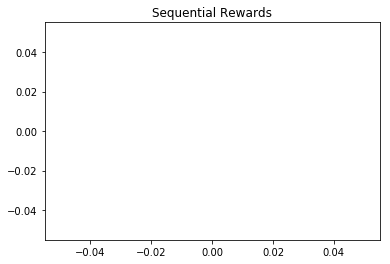

In [137]:
x = list(range(len(tmp_reward)))
plt.plot(x, tmp_reward)
plt.title('Sequential Rewards')
plt.savefig(f'./res_geneticAlgorithm/Sequential_Rewards_eps:{eps}_popsize:{pop_size}_generation:{generation}_mutation_pob:{mutation_pob}_exchange_prob:{exchange_prob}_cross_prob:{cross_prob}.jpg')
plt.show()


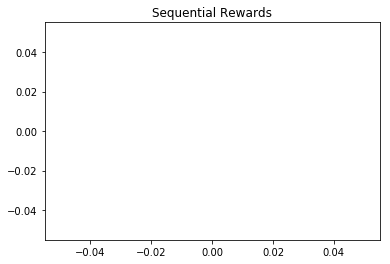

In [138]:
x = list(range(len(REWARDS)))
plt.plot(x, REWARDS)
plt.title('Sequential Rewards')
plt.savefig(f'./res_geneticAlgorithm/Sequential_Rewards_eps:{eps}_popsize:{pop_size}_generation:{generation}_mutation_pob:{mutation_pob}_exchange_prob:{exchange_prob}_cross_prob:{cross_prob}.jpg')
plt.show()

# Elite exploration_old

In [12]:
envSeqDec = ChallengeProveEnvironment()
elite = {'1': [1, 0], '2': [0, 1], '3': [1, 1], '4': [1, 0], '5': [0.5, 1]}
elite_ = {'1': [0, 1], '2': [1, 0], '3': [0, 1], '4': [1, 0], '5': [1, 1]}
elite3_ = {'1': [0, 1], '2': [1, 0], '3': [0, 1], '4': [1, 0], '5': [0, 1]}
x = 1
elite3 = {'1': [1-x, x], '2': [x, 1-x], '3': [1-x, x], '4': [x, 1-x], '5': [1-x, x]}
elite4_ = {'1': [0, 0.8], '2': [1, 0], '3': [0.6, 1], '4': [0, 0.8], '5': [1, 0]}
elite4 = {'2': [0, 0.8], '1': [1, 0], '4': [0, 0.8], '3': [1, 0], '5': [1, 0]}
res_10 = []
for i in range(10):
    reward= envSeqDec.evaluatePolicy(elite4_)
    print(reward)
    res_10.append(reward)

105  Evaluations Remaining
-35.99641377800607
100  Evaluations Remaining
-49.71271280902482
95  Evaluations Remaining
3.0129850115668795
90  Evaluations Remaining
-46.21438306444538
85  Evaluations Remaining
-6.987502701152574
80  Evaluations Remaining
-67.87769421089595
75  Evaluations Remaining
-76.80761901113127
70  Evaluations Remaining
-38.42558300836988
65  Evaluations Remaining
-81.69666147506018
60  Evaluations Remaining
-2.874667062341274


In [35]:
res_10

[547.5227387897094,
 542.938096483859,
 533.1127182034654,
 536.3813675920854,
 525.4762855585035,
 545.555719417165,
 505.65735556551016,
 537.4784218045536,
 542.6211926526237,
 522.8956765959584]

In [5]:
res_5 = {}
for i in range(21):
    tmp_5 = []
    for _ in range(5):
        elite3 = {'1': [0, 1], '2': [1, 0], '3': [0, 1], '4': [1, 0], '5': [i * 0.05, 1]}
        reward_5 = envSeqDec.evaluatePolicy(elite3)
        tmp_5.append(reward_5)
    res_5[i] = sum(tmp_5)/len(tmp_5)
    print(i, '  ',res_5[i])

NameError: name 'envSeqDec' is not defined

# Elite exploration_new

In [15]:
envSeqDec = ChallengeProveEnvironment()
elite = {'1': [0.04, 0.89], '2': [0.99, 0.0], '3': [0.15, 0.95], '4': [1.0, 0.17], '5': [0.13, 0.95]}

res_10 = []
for i in range(10):
    reward= envSeqDec.evaluatePolicy(elite)
    print(reward)
    res_10.append(reward)
elite = {'1': [0.04, 0.89], '2': [0.99, 0.0], '3': [0.15, 0.95], '4': [1.0, 0.17], '5': [0.13, 0.95]}

105  Evaluations Remaining
102.81399029932534
100  Evaluations Remaining
89.34667008874703
95  Evaluations Remaining
99.94768474596255
90  Evaluations Remaining
105.74380170807468
85  Evaluations Remaining


KeyboardInterrupt: 

In [12]:

res_elite = [{'1': [0.30000000000000004, 0.9], '2': [0.7000000000000001, 0.1], '3': [0.6000000000000001, 0.1], '4': [0.6000000000000001, 0.1], '5': [0.0, 0.4]}, {'1': [0.30000000000000004, 0.9], '2': [0.7000000000000001, 0.1], '3': [0.6000000000000001, 0.1], '4': [0.6000000000000001, 0.1], '5': [0.0, 0.4]}, {'1': [0.30000000000000004, 0.9], '2': [0.7000000000000001, 0.1], '3': [0.6000000000000001, 0.1], '4': [0.6000000000000001, 0.1], '5': [0.0, 0.4]}]

print(res_elite[0])
print(res_elite[1])
print(res_elite[2])


{'1': [0.30000000000000004, 0.9], '2': [0.7000000000000001, 0.1], '3': [0.6000000000000001, 0.1], '4': [0.6000000000000001, 0.1], '5': [0.0, 0.4]}
{'1': [0.30000000000000004, 0.9], '2': [0.7000000000000001, 0.1], '3': [0.6000000000000001, 0.1], '4': [0.6000000000000001, 0.1], '5': [0.0, 0.4]}
{'1': [0.30000000000000004, 0.9], '2': [0.7000000000000001, 0.1], '3': [0.6000000000000001, 0.1], '4': [0.6000000000000001, 0.1], '5': [0.0, 0.4]}


##### find by GA fixed 1:[0.2, 1] and 5:[0.1, 0.5] 

In [18]:
tmp = [{'1': [0.2, 1.0], '2': [0.1, 1], '3': [0.6, 0.2], '4': [1, 0.1], '5': [0.0, 0.5]}, {'1': [0.2, 1.0], '2': [1, 0.3], '3': [0.4, 0.7], '4': [0.7, 0.5], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.2, 1], '3': [0.9, 0.7], '4': [1, 0.1], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.6, 0.1], '3': [0.2, 0.8], '4': [0.5, 0.5], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.4, 0.7], '3': [1, 0.4], '4': [0.5, 0.3], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.3, 0.7], '3': [0.7, 0], '4': [0.4, 0], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.8, 0.3], '3': [0.5, 0.9], '4': [0.7, 0.5], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.2, 1], '3': [0.8, 0.4], '4': [0, 0.5], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.8, 0.5], '3': [0.3, 0.7], '4': [0.9, 0.2], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.6, 0.1], '3': [0.3, 0.8], '4': [0.8, 0.5], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.6, 0], '3': [0.4, 0.8], '4': [1, 0.5], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.1, 0.6], '3': [0.9, 0.7], '4': [0.7, 0.1], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [1, 0.4], '3': [0.4, 0.8], '4': [1, 0.4], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.1, 0.9], '3': [0.9, 0], '4': [1, 0.4], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.3, 0.7], '3': [0.7, 0.1], '4': [0, 0.4], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.9, 0.5], '3': [0.3, 0.9], '4': [1, 0.1], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.8, 0.5], '3': [0.4, 0.6], '4': [0.6, 0.2], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.9, 0.3], '3': [0.5, 0.9], '4': [1, 0.5], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [1, 0], '3': [0.5, 0.9], '4': [1, 0.4], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [1, 0], '3': [0.5, 0.6], '4': [0.8, 0.4], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0, 0.7], '3': [0.8, 0.2], '4': [0.5, 0.4], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.3, 0.9], '3': [0.6, 0.1], '4': [0.1, 0.4], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.9, 0.1], '3': [0.4, 0.7], '4': [0.4, 0], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.8, 0.8], '3': [0.9, 0.1], '4': [0.6, 0], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [1, 0.1], '3': [0.3, 1], '4': [0.8, 0], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.2, 1], '3': [0.9, 1], '4': [0.9, 0.2], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.2, 1], '3': [0.9, 1], '4': [0.9, 0.2], '5': [0.1, 0.5]}]

res = []
for x in tmp:
    if x not in res:
        res.append(x)
        envSeqDec = ChallengeProveEnvironment()
        r = envSeqDec.evaluatePolicy(x)
        print(x, r)

105  Evaluations Remaining
{'1': [0.2, 1.0], '2': [0.1, 1], '3': [0.6, 0.2], '4': [1, 0.1], '5': [0.0, 0.5]} 512.7890473521682
105  Evaluations Remaining
{'1': [0.2, 1.0], '2': [1, 0.3], '3': [0.4, 0.7], '4': [0.7, 0.5], '5': [0.1, 0.5]} 524.9357891798561
105  Evaluations Remaining
{'1': [0.2, 1.0], '2': [0.2, 1], '3': [0.9, 0.7], '4': [1, 0.1], '5': [0.1, 0.5]} 514.2832919054702
105  Evaluations Remaining
{'1': [0.2, 1.0], '2': [0.6, 0.1], '3': [0.2, 0.8], '4': [0.5, 0.5], '5': [0.1, 0.5]} 496.0059502483253
105  Evaluations Remaining
{'1': [0.2, 1.0], '2': [0.4, 0.7], '3': [1, 0.4], '4': [0.5, 0.3], '5': [0.1, 0.5]} 541.0074359284015
105  Evaluations Remaining
{'1': [0.2, 1.0], '2': [0.3, 0.7], '3': [0.7, 0], '4': [0.4, 0], '5': [0.1, 0.5]} 514.7618951879128
105  Evaluations Remaining
{'1': [0.2, 1.0], '2': [0.8, 0.3], '3': [0.5, 0.9], '4': [0.7, 0.5], '5': [0.1, 0.5]} 507.9979898311694
105  Evaluations Remaining
{'1': [0.2, 1.0], '2': [0.2, 1], '3': [0.8, 0.4], '4': [0, 0.5], '5': [0

20000  Evaluations Remaining
[0]
519.4217627309692
19995  Evaluations Remaining
[0]
552.6822659182722
19990  Evaluations Remaining
[0]
498.53470301404803
19985  Evaluations Remaining
[0]
539.8673753391191
19980  Evaluations Remaining
[0]
505.2020352620148
19975  Evaluations Remaining
[0]
520.237147710003
19970  Evaluations Remaining
[0]
506.8927467297112
19965  Evaluations Remaining
[0]
510.261666456238
19960  Evaluations Remaining
[0]
555.4117651855126
19955  Evaluations Remaining
[0]
523.5427078877294
19950  Evaluations Remaining
[0]
574.4883305672613
19945  Evaluations Remaining
[0]
528.3323977192133
19940  Evaluations Remaining
[0]
511.79941321455095
19935  Evaluations Remaining
[0]
548.0163118462353
19930  Evaluations Remaining
[0]
561.6267456794255
19925  Evaluations Remaining
[0]
534.6613867373467
19920  Evaluations Remaining
[0]
520.9993950816206
19915  Evaluations Remaining
[0]
496.24106515155444
19910  Evaluations Remaining
[0]
530.1270337031008
19905  Evaluations Remaining
[

[0]
562.8207935672505
19190  Evaluations Remaining
[0]
541.1434408133389
19185  Evaluations Remaining
[0]
530.6876617657417
19180  Evaluations Remaining
[0]
547.5433120144887
19175  Evaluations Remaining
[0]
524.3592028910484
19170  Evaluations Remaining
[0]
539.653875668067
19165  Evaluations Remaining
[0]
546.9102648513367
19160  Evaluations Remaining
[0]
503.24635237964776
19155  Evaluations Remaining
[0]
542.6387822737922
19150  Evaluations Remaining
[0]
534.8168022034434
19145  Evaluations Remaining
[0]
537.6986724013086
19140  Evaluations Remaining
[0]
534.4453682099795
19135  Evaluations Remaining
[0]
520.6707656535852
19130  Evaluations Remaining
[0]
498.99226867672024
19125  Evaluations Remaining
[0]
558.8785765982775
19120  Evaluations Remaining
[0]
523.218807731093
19115  Evaluations Remaining
[0]
543.9623558006925
19110  Evaluations Remaining
[0]
537.7957621609485
19105  Evaluations Remaining
[0]
533.1252033670903
19100  Evaluations Remaining
[0]
538.9394729616934
19095  Ev

[0]
563.5146410518603
18385  Evaluations Remaining
[0]
565.0923568381385
18380  Evaluations Remaining
[0]
532.432865805284
18375  Evaluations Remaining
[0]
534.1327116310513
18370  Evaluations Remaining
[0]
545.2636023260989
18365  Evaluations Remaining
[0]
547.764053831399
18360  Evaluations Remaining
[0]
499.46894803133733
18355  Evaluations Remaining
[0]
533.8629666716615
18350  Evaluations Remaining
[0]
517.6979092296594
18345  Evaluations Remaining
[0]
540.7776847970754
18340  Evaluations Remaining
[0]
553.8615636064745
18335  Evaluations Remaining
[0]
527.0225703893275
18330  Evaluations Remaining
[0]
546.8077093271385
18325  Evaluations Remaining
[0]
563.7195372174555
18320  Evaluations Remaining
[0]
513.8144620005254
18315  Evaluations Remaining
[0]
528.945176889602
18310  Evaluations Remaining
[0]
511.4947280282004
18305  Evaluations Remaining
[0]
523.0734373125849
18300  Evaluations Remaining
[0]
526.9016566461397
18295  Evaluations Remaining
[0]
545.6973933594913
18290  Eval

[0]
511.62064834109356
17580  Evaluations Remaining
[0]
520.0793782285772
17575  Evaluations Remaining
[0]
512.928110317307
17570  Evaluations Remaining
[0]
529.1963002526539
17565  Evaluations Remaining
[0]
508.3714527649535
17560  Evaluations Remaining
[0]
527.3882573526578
17555  Evaluations Remaining
[0]
515.615889867707
17550  Evaluations Remaining
[0]
510.9910160307112
17545  Evaluations Remaining
[0]
523.7583081249719
17540  Evaluations Remaining
[0]
551.609031301164
17535  Evaluations Remaining
[0]
540.9484063452303
17530  Evaluations Remaining
[0]
569.842037711825
17525  Evaluations Remaining
[0]
524.7743996704626
17520  Evaluations Remaining
[0]
542.1926335611057
17515  Evaluations Remaining
[0]
534.6496211422327
17510  Evaluations Remaining
[0]
512.2929641950725
17505  Evaluations Remaining
[0]
533.5598678936742


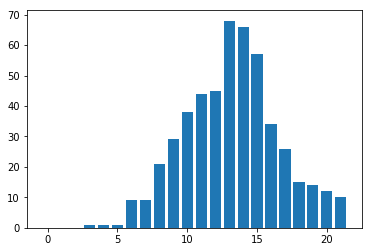

In [19]:
import matplotlib.pyplot as plt

elite1 = {'1': [0.2, 1], '2': [0.9, 0.5], '3': [0.3, 1], '4': [0.8, 0.3], '5': [0.1, 0.6]}
elite2 = {'1': [0.2, 0.9], '2': [0.6000000000000001, 0.7000000000000001], '3': [0.7000000000000001, 0.6000000000000001], '4': [0.4, 0.1], '5': [0.2, 0.4]}
elite3 = {'1': [0.2, 0.9], '2': [0.0, 0.8], '3': [0.30000000000000004, 0.2], '4': [0.7000000000000001, 0.30000000000000004], '5': [0.2, 0.5]}
elite4 = {'1': [0.2, 0.9], '2': [0.0, 0.8], '3': [0.30000000000000004, 0.2], '4': [0.7000000000000001, 0.30000000000000004], '5': [0.2, 0.5]}
elite5 = {'1': [0.2, 0.9], '2': [0.5, 0.2], '3': [0.0, 0.0], '4': [0.7000000000000001, 0.8], '5': [0.1, 0.6000000000000001]}
elite6 = {'1': [0.2, 0.9], '2': [0.0, 0.8], '3': [0.30000000000000004, 0.2], '4': [0.7000000000000001, 0.30000000000000004], '5': [0.2, 0.5]}
elite7 = {'1': [0.2, 0.9], '2': [0.5, 0.2], '3': [0.0, 0.0], '4': [0.7000000000000001, 0.8], '5': [0.1, 0.6000000000000001]}
elite8 = {'1': [0.2, 0.9], '2': [0.6000000000000001, 0.4], '3': [0.2, 0.30000000000000004], '4': [0.5, 0.30000000000000004], '5': [0.1, 0.6000000000000001]}
elite9 = {'1': [0.2, 0.9], '2': [0.6000000000000001, 0.4], '3': [0.2, 0.30000000000000004], '4': [0.5, 0.30000000000000004], '5': [0.1, 0.6000000000000001]}
# yashu kang
elite_8 = {'1': [0.2, 1.0], '2': [0.5, 0.5], '3': [0.9, 0.0], '4': [0.7, 0.1], '5': [0.1, 0.5]}
elite_9 = {'1': [0.2, 1.0], '2': [0.5, 0.1], '3': [1.0, 0.5], '4': [0.5, 0.6], '5': [0.1, 0.5]}

# Typical 
elite_10 = {'1': [0.2, 1.0], '2': [0.5, 0.1], '3': [0.1, 0.5], '4': [0.5, 0.1], '5': [0.1, 0.5]}

# test
elite_test = {'1': [0.2, 0.0], '2': [1.0, 0.1], '3': [0.0, 0.1], '4': [0.1, 0.1], '5': [0.1, 0.5]}

# zhaowei zhu
e1 = {'4': [0.8, 0.2], '2': [0.6, 0.2], '1': [0.2, 1.0], '5': [0.1, 0.5], '3': [0.0, 0.2]}

res = []
envSeqDec = ChallengeProveEnvironment(experimentCount = 20000)

low_bound = 470
high_bound = 570
gap = 5
num_x = int((high_bound - low_bound) / gap)
hist = [0 for _ in range(num_x)]
low = 0
high = 0

for i in range(500):
    
    #envSeqDec.labels = [7,8]
    
    r = envSeqDec.evaluatePolicy(e1)
    print(envSeqDec.labels)
    print(r)
    if 0 <= (r-low_bound) // gap <= num_x - 1:
        hist[int((r-low_bound) // gap)] += 1
    elif (r-low_bound) // gap < 0:
        low += 1
    elif (r-low_bound) // gap > num_x - 1:
        high += 1
    
    res.append(r)
#x = list(range(len(res)))
#plt.plot(x, res)
hist = [low] + hist
hist.append(high)
plt.bar(range(len(hist)), hist)  
plt.show() 


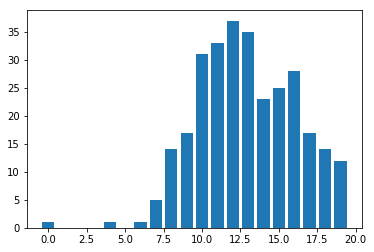

In [16]:
plt.bar(range(20), hist[:20])  
plt.show() 

# LSTM

##### example code

In [23]:
!pip install keras

    100% |████████████████████████████████| 317kB 668kB/s ta 0:00:01


In [235]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=8000) #前8000个单词(每局评论至多包含8000个单词)
print('shape of train data is ',train_data.shape)
print('shape of train labels is ',train_labels.shape)
print('an example of train data is ',train_data[5])
train_data

shape of train data is  (25000,)
shape of train labels is  (25000,)
an example of train data is  [1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 7982, 1051, 2, 32, 85, 156, 45, 40, 148, 139, 121, 664, 665, 10, 10, 1361, 173, 4, 749, 2, 16, 3804, 8, 4, 226, 65, 12, 43, 127, 24, 2, 10, 10]


array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 2, 78, 228, 5,

In [240]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

##### my code

In [349]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(16,activation='relu',input_shape=(11,)))
    model.add(layers.Dense(16,activation='relu'))
    model.add(layers.Dense(1,activation='sigmoid'))
    model.compile(optimizer='rmsprop',# 还可以通过optimizer = optimizers.RMSprop(lr=0.001)来为优化器指定参数
                  loss='binary_crossentropy', # 等价于loss = losses.binary_crossentropy
                  metrics=['accuracy']) # 等价于metrics = [metircs.binary_accuracy]
    return model
model = build_model()




In [418]:
# data processing
import numpy as np
tmp_true = [{'1': [0.2, 1.0], '2': [0.1, 1], '3': [0.6, 0.2], '4': [1, 0.1], '5': [0.0, 0.5]}, {'1': [0.2, 1.0], '2': [1, 0.3], '3': [0.4, 0.7], '4': [0.7, 0.5], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.2, 1], '3': [0.9, 0.7], '4': [1, 0.1], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.6, 0.1], '3': [0.2, 0.8], '4': [0.5, 0.5], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.4, 0.7], '3': [1, 0.4], '4': [0.5, 0.3], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.3, 0.7], '3': [0.7, 0], '4': [0.4, 0], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.8, 0.3], '3': [0.5, 0.9], '4': [0.7, 0.5], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.2, 1], '3': [0.8, 0.4], '4': [0, 0.5], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.8, 0.5], '3': [0.3, 0.7], '4': [0.9, 0.2], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.6, 0.1], '3': [0.3, 0.8], '4': [0.8, 0.5], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.6, 0], '3': [0.4, 0.8], '4': [1, 0.5], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.1, 0.6], '3': [0.9, 0.7], '4': [0.7, 0.1], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [1, 0.4], '3': [0.4, 0.8], '4': [1, 0.4], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.1, 0.9], '3': [0.9, 0], '4': [1, 0.4], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.3, 0.7], '3': [0.7, 0.1], '4': [0, 0.4], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.9, 0.5], '3': [0.3, 0.9], '4': [1, 0.1], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.8, 0.5], '3': [0.4, 0.6], '4': [0.6, 0.2], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.9, 0.3], '3': [0.5, 0.9], '4': [1, 0.5], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [1, 0], '3': [0.5, 0.9], '4': [1, 0.4], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [1, 0], '3': [0.5, 0.6], '4': [0.8, 0.4], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0, 0.7], '3': [0.8, 0.2], '4': [0.5, 0.4], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.3, 0.9], '3': [0.6, 0.1], '4': [0.1, 0.4], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.9, 0.1], '3': [0.4, 0.7], '4': [0.4, 0], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.8, 0.8], '3': [0.9, 0.1], '4': [0.6, 0], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [1, 0.1], '3': [0.3, 1], '4': [0.8, 0], '5': [0.1, 0.5]}, {'1': [0.2, 1.0], '2': [0.2, 1], '3': [0.9, 1], '4': [0.9, 0.2], '5': [0.1, 0.5]}]
tmp_false = [{'1': [0.9, 0.3], '2': [0.6, 0.0], '3': [0.4, 0.0], '4': [0.8, 0.8], '5': [0.2, 0.6]}, {'1': [1.0, 0.0], '2': [0.6, 0.0], '3': [0.4, 0.0], '4': [0.8, 0.8], '5': [0.4, 0.6]}, {'1': [0.4, 0.7], '2': [0.6, 0.0], '3': [0.4, 0.0], '4': [0.8, 0.8], '5': [0.2, 0.6]}, {'1': [0.6, 0.0], '2': [0.6, 0.0], '3': [0.4, 0.0], '4': [0.8, 0.8], '5': [0.6000000000000001, 0.4]}, {'1': [0.4, 0.3], '2': [0.6, 0.0], '3': [0.4, 0.0], '4': [0.8, 0.8], '5': [0.8, 0.4]}, {'1': [0.4, 0.0], '2': [0.6, 0.0], '3': [0.4, 0.0], '4': [0.8, 0.8], '5': [1.0, 0.3]}, {'1': [0.3, 0.1], '2': [0.6, 0.0], '3': [0.4, 0.0], '4': [0.8, 0.8], '5': [0.4, 0.6]}, {'1': [0.4, 1.0], '2': [0.6, 0.0], '3': [0.4, 0.0], '4': [0.8, 0.8], '5': [0.9, 0.3]}, {'1': [0.0, 0.5], '2': [0.6, 0.0], '3': [0.4, 0.0], '4': [0.8, 0.8], '5': [0.2, 0.6]}, {'1': [0.9, 0.0], '2': [0.6, 0.0], '3': [0.4, 0.0], '4': [0.8, 0.8], '5': [0.4, 0.4]}, {'1': [0.4, 0.2], '2': [0.6, 0.0], '3': [0.4, 0.0], '4': [0.8, 0.8], '5': [0.4, 0.4]}, {'1': [0.3, 0.8], '2': [0.6, 0.0], '3': [0.4, 0.0], '4': [0.8, 0.8], '5': [0.2, 0.6]}, {'1': [0.8, 0.8], '2': [0.6, 0.0], '3': [0.4, 0.0], '4': [0.8, 0.8], '5': [0.4, 0.4]}, {'1': [0.3, 0.4], '2': [0.6, 0.0], '3': [0.4, 0.0], '4': [0.8, 0.8], '5': [0.6, 0.4]}, {'1': [0.2, 0.4], '2': [0.6, 0.0], '3': [0.4, 0.0], '4': [0.8, 0.8], '5': [0.2, 0.6]}, {'1': [0.3, 0.3], '2': [0.6, 0.0], '3': [0.4, 0.0], '4': [0.8, 0.8], '5': [0.6, 0.4]}, {'1': [0.7000000000000001, 0.4], '2': [0.5, 0.9], '3': [0.4, 0.5], '4': [0.9, 0.2], '5': [0.9, 0.9]}, {'1': [0.9, 0.5], '2': [0.6, 0.0], '3': [0.4, 0.0], '4': [0.8, 0.8], '5': [0.6, 0.6]}, {'1': [0.4, 0.3], '2': [0.6, 0.0], '3': [0.4, 0.0], '4': [0.8, 0.8], '5': [0.4, 0.6]}, {'1': [0.6, 1.0], '2': [0.6, 0.0], '3': [0.4, 0.0], '4': [0.8, 0.8], '5': [0.2, 0.6]}, {'1': [0.1, 0.8], '2': [0.8, 0.9], '3': [0.2, 0.30000000000000004], '4': [0.8, 0.7000000000000001], '5': [0.5, 0.30000000000000004]}, {'1': [0.8, 0.1], '2': [0.6, 0.0], '3': [0.4, 0.0], '4': [0.8, 0.8], '5': [0.6, 0.6]}, {'1': [0.5, 0.7], '2': [0.6, 0.0], '3': [0.4, 0.0], '4': [0.8, 0.8], '5': [0.6, 0.6]}, {'1': [0.1, 0.8], '2': [0.6000000000000001, 0.5], '3': [0.30000000000000004, 0.8], '4': [0.1, 0.9], '5': [0.5, 0.6000000000000001]}, {'1': [0.6, 0.4], '2': [0.6, 0.0], '3': [0.4, 0.0], '4': [0.8, 0.8], '5': [1.0, 0.6]}, {'1': [0.5, 0.3], '2': [0.6, 0.0], '3': [0.4, 0.0], '4': [0.8, 0.8], '5': [0.2, 0.6]}, {'1': [0.7000000000000001, 0.7000000000000001], '2': [0.5, 0.0], '3': [0.1, 0.2], '4': [0.30000000000000004, 0.2], '5': [0.30000000000000004, 0.2]}, {'1': [0.2, 0.2], '2': [0.6, 0.0], '3': [0.4, 0.0], '4': [0.8, 0.8], '5': [0.4, 0.6]}, {'1': [0.4, 0.4], '2': [0.6, 0.0], '3': [0.4, 0.0], '4': [0.8, 0.8], '5': [0.1, 0.6]}]

train_data = []
train_label = []

# True data
for d in tmp_true:
    tmp = []
    for v in list(d.values()):
        v = [int(v[i] * 10) for i in range(len(v))]
        tmp.extend(v)
    train_label.append(1)
    train_data.append((list(tmp)))

# False data    
for d in tmp_false:
    tmp = []
    for v in list(d.values()):
        v = [int(v[i] * 10) for i in range(len(v))]
        tmp.extend(v)
    train_label.append(0)
    train_data.append((list(tmp)))
    
train_data = np.array(train_data)



In [419]:
train_data[0]

array([ 2, 10,  1, 10,  6,  2, 10,  1,  0,  5])

In [420]:
import numpy as np
# 神经网络的输入必须是tensor而不是list，所以需要将数据集处理为25000*8000
def vectorize_sequences(sequences,dimension=11):
    # 生成25000*8000的二维Numpy数组
    results = np.zeros((len(sequences),dimension))
    # one-hot编码
     
    for i,sequence in enumerate(sequences):
        #print(i,(sequence * 1))
        results[i,[int(s) for s in sequence]] = 1.
    return results

train_data = vectorize_sequences(train_data)
train_label = np.asarray(train_label).astype('float32')


In [421]:
train_data

array([[1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.],
       [0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1.],
       [0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1.],
       [0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1.],
       [0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1.],
       [1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1.],
       [0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.],
       [1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.],
       [0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.],
       [1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1.],
       [0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.],
       [1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1.],
       [0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1.],
       [0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.],
       [0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1.],
       [1., 1., 1., 0., 1., 1., 0., 0., 0., 1.

In [422]:
train_data_

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [423]:
train_label

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.], dtype=float32)

In [424]:
random_seed = list(range(len(train_data)))
np.random.shuffle(random_seed)
train_data_ = np.zeros((len(train_data),11))
train_label_ = np.zeros((len(train_label),1))

for i in range(len(random_seed)):
    #print('train_data_',train_data_[random_seed[i]])
    #print('train_data',train_data[i])
    train_data_[random_seed[i]] = train_data[i]
    train_label_[random_seed[i]] = train_label[i]

train_data = train_data_
train_label = train_label_

In [425]:
x_val = train_data[:20]
partial_x_train = train_data[20:]
y_val = train_label[:20]
partial_y_train = train_label[20:]

In [426]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40, # 在全数据集上迭代200次
                    batch_size=1,) # 每个batch的大小为1
                    #validation_data=(x_val,y_val))


Epoch 1/40
35/35 [==============================] - 0s 983us/step - loss: 6.6912e-05 - acc: 1.0000
Epoch 2/40
35/35 [==============================] - 0s 889us/step - loss: 6.7491e-06 - acc: 1.0000
Epoch 3/40
35/35 [==============================] - 0s 784us/step - loss: 4.4920e-06 - acc: 1.0000
Epoch 4/40
35/35 [==============================] - 0s 948us/step - loss: 4.0223e-06 - acc: 1.0000
Epoch 5/40
35/35 [==============================] - 0s 725us/step - loss: 3.0704e-06 - acc: 1.0000
Epoch 6/40
35/35 [==============================] - 0s 746us/step - loss: 2.0922e-06 - acc: 1.0000
Epoch 7/40
35/35 [==============================] - 0s 713us/step - loss: 2.0000e-06 - acc: 1.0000
Epoch 8/40
35/35 [==============================] - 0s 741us/step - loss: 1.5162e-06 - acc: 1.0000
Epoch 9/40
35/35 [==============================] - 0s 785us/step - loss: 8.8183e-07 - acc: 1.0000
Epoch 10/40
35/35 [==============================] - 0s 712us/step - loss: 9.6990e-07 - acc: 1.0000
Epoch 11/

In [344]:
test = vectorize_sequences(np.array([[9,3,6,0,4,0,8,8,2,6]]))
model.predict(test)

array([[1.4054589e-20]], dtype=float32)

In [329]:
test

array([[1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.]])

# 方差探索

In [50]:
print(sum(res1)/20)
print(sum(res2)/20)

451.4205517340241
463.7132167773677


In [49]:
res1 = []
res2 = []
p1 = {'1': [0.2, 1], '2': [0.9, 0.5], '3': [0.3, 1], '4': [0.8, 0.3], '5': [0.1, 0.6]}
p2 = {'1': [0.2, 0.9], '2': [0.6000000000000001, 0.4], '3': [0.2, 0.30000000000000004], '4': [0.5, 0.30000000000000004], '5': [0.1, 0.6000000000000001]}
for _ in range(20):
    envSeqDec = ChallengeProveEnvironment()
    r1 = envSeqDec.evaluatePolicy(p1)
    r2 = envSeqDec.evaluatePolicy(p2)
    res1.append(r1)
    res2.append(r2)

print(sum(res1)/20)
print(sum(res2)/20)



105  Evaluations Remaining
100  Evaluations Remaining
105  Evaluations Remaining
100  Evaluations Remaining
105  Evaluations Remaining
100  Evaluations Remaining
105  Evaluations Remaining
100  Evaluations Remaining
105  Evaluations Remaining
100  Evaluations Remaining
105  Evaluations Remaining
100  Evaluations Remaining
105  Evaluations Remaining
100  Evaluations Remaining
105  Evaluations Remaining
100  Evaluations Remaining
105  Evaluations Remaining
100  Evaluations Remaining
105  Evaluations Remaining
100  Evaluations Remaining
105  Evaluations Remaining
100  Evaluations Remaining
105  Evaluations Remaining
100  Evaluations Remaining
105  Evaluations Remaining
100  Evaluations Remaining
105  Evaluations Remaining
100  Evaluations Remaining
105  Evaluations Remaining
100  Evaluations Remaining
105  Evaluations Remaining
100  Evaluations Remaining
105  Evaluations Remaining
100  Evaluations Remaining
105  Evaluations Remaining
100  Evaluations Remaining
105  Evaluations Remaining
1

TypeError: 'float' object is not iterable

In [53]:
gap1 = []
gap2 = []
p1 = {'1': [0.2, 1], '2': [0.9, 0.5], '3': [0.3, 1], '4': [0.8, 0.3], '5': [0.1, 0.6]}
p2 = {'1': [0.2, 0.9], '2': [0.6000000000000001, 0.4], '3': [0.2, 0.30000000000000004], '4': [0.5, 0.30000000000000004], '5': [0.1, 0.6000000000000001]}
for _ in range(20):
    envSeqDec = ChallengeProveEnvironment()
    r1 = envSeqDec.evaluatePolicy(p1)
    r2 = envSeqDec.evaluatePolicy(p2)
    print(envSeqDec.labels)
    gap1.append(r1 - 451.4205517340241)
    gap2.append(r2 - 463.7132167773677)

print(gap1)
print(gap2)



105  Evaluations Remaining
HTTPSConnectionPool(host='seqenvironment.eu-gb.mybluemix.net', port=443): Max retries exceeded with url: /prove/evaluate/policy/ (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x1226e8080>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))
100  Evaluations Remaining
HTTPSConnectionPool(host='seqenvironment.eu-gb.mybluemix.net', port=443): Max retries exceeded with url: /prove/evaluate/policy/ (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x1226e8240>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))
[0]
105  Evaluations Remaining
HTTPSConnectionPool(host='seqenvironment.eu-gb.mybluemix.net', port=443): Max retries exceeded with url: /prove/evaluate/policy/ (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x1226e84a8>: Failed to establish a new connection: [

KeyboardInterrupt: 

# Example submission: test.py
# Offical template

In [ ]:
from sys import exit, exc_info, argv
import numpy as np
import pandas as pd

!pip3 install git+https://github.com/slremy/netsapi --user --upgrade

from netsapi.challenge import *

class CustomAgent:
    def __init__(self, environment):
        self.environment = environment

    def generate(self):
        best_policy = None
        best_reward = -float('Inf')
        candidates = []
        try:
            # Agents should make use of 20 episodes in each training run, if making sequential decisions
            for i in range(20):
                self.environment.reset()
                policy = {}
                for j in range(5): #episode length
                    policy[str(j+1)]=[random.random(),random.random()]
                candidates.append(policy)
                
            rewards = self.environment.evaluatePolicy(candidates)
            best_policy = candidates[np.argmax(rewards)]
            best_reward = rewards[np.argmax(rewards)]
        
        except (KeyboardInterrupt, SystemExit):
            print(exc_info())
            
        return best_policy, best_reward

In [ ]:
EvaluateChallengeSubmission(ChallengeSeqDecEnvironment, CustomAgent, "example.csv")


# Find the best seed

In [5]:
best = 0
biggest_reward = 0
candidate = []
import random
for i in range(0,200,2):
    print(i)
    envSeqDec = ChallengeSeqDecEnvironment(experimentCount = 10000) # Initialise a New Challenge Environment to post entire policy
    env = ChallengeEnvironment(experimentCount = 10000)
    eps = 0.2 # equal to actions space resolution # range/eps
    pop_size = 4
    cross_prob = 1
    exchange_prob = 1
    mutation_pob = 1
    generation = 4
    REWARDS = []
    NEW = []
    POLICY = []
    tmp_reward = []
    tmp_policy = []

    random.seed(i)

    raodong = 5
    elite_ = {'1': [1, 1], '2': [1, 1], '3': [1, 1], '4': [1, 1], '5': [1, 1]}
    #bodong = envSeqDec.evaluatePolicy(elite_)


    # 2. Define population
    indv_template = DecimalIndividual(ranges=[(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1),(0, 1), (0, 1)], eps=eps)
    population = Population(indv_template=indv_template, size = pop_size)
    population.init()  # Initialize population with individuals.

    # 3. Create genetic operators

    # Use built-in operators here.
    selection = RouletteWheelSelection()
    crossover = UniformCrossover(pc=cross_prob, pe=exchange_prob) # PE = Gene exchange probability
    mutation = FlipBitMutation(pm=mutation_pob) # 0.1 todo The probability of mutation

    # 4. Create genetic algorithm engine to run optimization

    engine = GAEngine(population=population, selection=selection,
                      crossover=crossover, mutation=mutation,)
                     # analysis=[FitnessStore])


    # 5. Define and register fitness function   
    @engine.fitness_register
    #@engine.dynamic_linear_scaling(target='max', ksi0=2, r=0.9)

    def fitness(indv):
        p = [0 for _ in range(10)]
        p = indv.solution
        policy = {'1': [p[0], p[1]], '2': [p[2], p[3]], '3': [p[4], p[5]], '4': [p[6], p[7]], '5': [p[8], p[9]]}
        reward = envSeqDec.evaluatePolicy(policy) # Action in Year 1 only
        #print('Sequential Result : ', reward)
        tmp_reward.append(reward)
        tmp_policy.append(policy)
        tmp_single = []
    #     for i in range(5):
    #         tmp_single.append(env.evaluateReward(np.asarray(policy[str(i + 1)])))
    #         print('Reward of point', str(i), ' : ', tmp_single[i])
    #     print('Sum of single point : ', sum(tmp_single)) 
    #    NEW.append(sum(tmp))
        return reward + uniform(-raodong,raodong) 

    @engine.analysis_register
    class ConsoleOutput(OnTheFlyAnalysis):
        master_only = True
        interval = 1
        def register_step(self, g, population, engine):
            best_indv = population.best_indv(engine.fitness)
            msg = 'Generation: {}, best fitness: {:.3f}'.format(g + 1, engine.fmax)
            best_reward = max(tmp_reward[g : g + pop_size * generation])
            REWARDS.append(best_reward)
            #best_policy = POLICY[tmp_reward.index(best_reward)]
            #POLICY.append(best_policy)
            engine.logger.info(msg)

    engine.run(ng = generation)
    print(REWARDS[-1])
    if REWARDS[-1] > biggest_reward:
        best = i
    if REWARDS[-1] > 450:
        candidate.append(i)
    print(candidate)


0
10000  Evaluations Remaining
9995  Evaluations Remaining
9990  Evaluations Remaining


KeyboardInterrupt: 

# Choose the best candidate in 5 runs

In [ ]:
best_5_runs = []
for j in range(5):
    best = 0
    biggest_reward = 0
    candidate_rewards = []
    candidate = [49, 55, 103, 187, 199, 20, 30, 54, 76, 124, 180]
    for i in candidate:
        print(i)
        import random
        envSeqDec = ChallengeSeqDecEnvironment(experimentCount = 10000) # Initialise a New Challenge Environment to post entire policy
        env = ChallengeEnvironment(experimentCount = 10000)
        eps = 1 # equal to actions space resolution # range/eps
        pop_size = 4
        cross_prob = 1
        exchange_prob = 1
        mutation_pob = 1
        generation = 4
        REWARDS = []
        NEW = []
        POLICY = []
        tmp_reward = []
        tmp_policy = []

        random.seed(i)

        raodong = 5
        elite_ = {'1': [1, 1], '2': [1, 1], '3': [1, 1], '4': [1, 1], '5': [1, 1]}
        #bodong = envSeqDec.evaluatePolicy(elite_)


        # 2. Define population
        indv_template = DecimalIndividual(ranges=[(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1),(0, 1), (0, 1)], eps=eps)
        population = Population(indv_template=indv_template, size = pop_size)
        population.init()  # Initialize population with individuals.

        # 3. Create genetic operators

        # Use built-in operators here.
        selection = RouletteWheelSelection()
        crossover = UniformCrossover(pc=cross_prob, pe=exchange_prob) # PE = Gene exchange probability
        mutation = FlipBitMutation(pm=mutation_pob) # 0.1 todo The probability of mutation

        # 4. Create genetic algorithm engine to run optimization

        engine = GAEngine(population=population, selection=selection,
                          crossover=crossover, mutation=mutation,)
                         # analysis=[FitnessStore])


        # 5. Define and register fitness function   
        policy = policies[0]
        @engine.fitness_register
        #@engine.dynamic_linear_scaling(target='max', ksi0=2, r=0.9)

        def fitness(indv):
            p = [0 for _ in range(10)]
            p = indv.solution
            policy = {'1': [p[0], p[1]], '2': [p[2], p[3]], '3': [p[4], p[5]], '4': [p[6], p[7]], '5': [p[8], p[9]]}
            reward = envSeqDec.evaluatePolicy(policy) # Action in Year 1 only
            #print('Sequential Result : ', reward)
            tmp_reward.append(reward)
            tmp_policy.append(policy)
            tmp_single = []
        #     for i in range(5):
        #         tmp_single.append(env.evaluateReward(np.asarray(policy[str(i + 1)])))
        #         print('Reward of point', str(i), ' : ', tmp_single[i])
        #     print('Sum of single point : ', sum(tmp_single)) 
        #    NEW.append(sum(tmp))
            return reward + uniform(-raodong,raodong) 

        @engine.analysis_register
        class ConsoleOutput(OnTheFlyAnalysis):
            master_only = True
            interval = 1
            def register_step(self, g, population, engine):
                best_indv = population.best_indv(engine.fitness)
                msg = 'Generation: {}, best fitness: {:.3f}'.format(g + 1, engine.fmax)
                best_reward = max(tmp_reward[g : g + pop_size * generation])
                REWARDS.append(best_reward)
                #best_policy = POLICY[tmp_reward.index(best_reward)]
                #POLICY.append(best_policy)
                engine.logger.info(msg)

        engine.run(ng = generation)
        print(REWARDS[-1])
        if REWARDS[-1] > biggest_reward:
            best = i
            biggest_reward = REWARDS[-1]
        candidate_rewards.append(REWARDS[-1])
        print(best, max(candidate_rewards))
    best_5_runs.append([best, max(candidate_rewards)])

# Multi-Thread

In [6]:
import time
from multiprocessing import Pool
from functools import partial 


def generate(seed_candidate):
     
    seed_candidate

    import random
    envSeqDec = ChallengeSeqDecEnvironment(experimentCount = 10000) # Initialise a New Challenge Environment to post entire policy
    env = ChallengeEnvironment(experimentCount = 10000)
    best_policy = None
    best_reward = -float('Inf')
    candidates = []
    eps = 0.2 # equal to actions space resolution, eps is step size
    pop_size = 4
    cross_prob = 1
    exchange_prob = 1
    mutation_pob = 1
    generation = 4
    tmp_reward = []
    tmp_policy = []
    random.seed(seed_candidate)
    turb = 5
    print('Current candidate:', seed_candidate)
    try:
        print(seed_candidate)
        # Agents should make use of 20 episodes in each training run, if making sequential decisions

        # Define population
        indv_template = DecimalIndividual(ranges=[(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1),(0, 1), (0, 1)], eps=eps)
        population = Population(indv_template=indv_template, size = pop_size)
        population.init()  # Initialize population with individuals.

        # Create genetic operators
        # Use built-in operators here.
        selection = RouletteWheelSelection()
        crossover = UniformCrossover(pc=cross_prob, pe=exchange_prob) # PE = Gene exchange probability
        mutation = FlipBitMutation(pm=mutation_pob) # 0.1 todo The probability of mutation

        # Create genetic algorithm engine to run optimization
        engine = GAEngine(population=population, selection=selection,
                        crossover=crossover, mutation=mutation,)

        # Define and register fitness function
        @engine.fitness_register
        def fitness(indv):
            p = [0 for _ in range(10)]
            p = indv.solution
            policy = {'1': [p[0], p[1]], '2': [p[2], p[3]], '3': [p[4], p[5]], '4': [p[6], p[7]], '5': [p[8], p[9]]}
            reward = envSeqDec.evaluatePolicy(policy) # Action in Year 1 only
            print('Sequential Result : ', reward)
            tmp_reward.append(reward)
            tmp_policy.append(policy)
            tmp_single = []
            return reward + uniform(-turb, turb)

        # run
        engine.run(ng = generation)
        best_reward = max(tmp_reward)
        best_policy = tmp_policy[-pop_size]

    except (KeyboardInterrupt, SystemExit):
        print(exc_info())
    if best_reward > 400:
        anss[seed_candidate] = [best_reward, best_policy]
        print(f'************** seed{seed_candidate}, best_reward{best_reward}, best_policy{best_policy}')
    else:
        anss[seed_candidate] = 'bad_seed'
    

def main():

    pool = Pool()
    seed_candidate = list(range(1,200))
    func = partial(generate, )
    pool.map(func, seed_candidate)
    pool.close()
    pool.join()

    
print(f'搜索开始时间：{time.strftime("%Y-%m-%d %H:%M:%S")}')
anss = {}
main()
print(f'搜索结束时间：{time.strftime("%Y-%m-%d %H:%M:%S")}')


搜索开始时间：2019-06-27 09:39:02
Current candidate: 1
Current candidate: 11
Current candidate: 16
Current candidate: 36
Current candidate: 6
Current candidate: 21
Current candidate: 26
6
Current candidate: 31
11
Current candidate: 41
Current candidate: 46
Current candidate: 51
1
26
Current candidate: 56
16
36
51
46
31
41
21
10000  Evaluations Remaining
56
10000  Evaluations Remaining
10000  Evaluations Remaining
10000  Evaluations Remaining
10000  Evaluations Remaining
10000  Evaluations Remaining
10000  Evaluations Remaining
10000  Evaluations Remaining
10000  Evaluations Remaining
10000  Evaluations Remaining
10000  Evaluations Remaining
10000  Evaluations Remaining
Sequential Result :  73.09428786453421
9995  Evaluations Remaining
Sequential Result :  -6.904832743176941
9995  Evaluations Remaining
Sequential Result :  79.87754544355708
Sequential Result :  106.75944129054847
Sequential Result :  81.71720142226127
Sequential Result :  120.94286986458252
9995  Evaluations Remaining
9995  Ev

9950  Evaluations Remaining
Sequential Result :  103.68772513410495
9955  Evaluations Remaining
Sequential Result :  -85.66282048959371
9950  Evaluations Remaining
Sequential Result :  155.67949278529161
9955  Evaluations Remaining
Sequential Result :  34.14883287849077
9950  Evaluations Remaining
Sequential Result :  33.06176534676878
9950  Evaluations Remaining
Sequential Result :  23.895589901611928
9950  Evaluations Remaining
Sequential Result :  66.77841697703023
9945  Evaluations Remaining
Sequential Result :  -91.75349310664424
9945  Evaluations Remaining
Sequential Result :  -38.765960948565514
9945  Evaluations Remaining
Sequential Result :  2.059665903170334
9945  Evaluations Remaining
Sequential Result :  -8.296407709512692
9945  Evaluations Remaining
Sequential Result :  88.36938809080948
9950  Evaluations Remaining
Sequential Result :  221.56765019630035
9945  Evaluations Remaining
Sequential Result :  178.34936486073534
9945  Evaluations Remaining
Sequential Result :  67.

Sequential Result :  229.91484078448616
9915  Evaluations Remaining
Sequential Result :  146.015176232153
9905  Evaluations Remaining
Sequential Result :  174.0421460736189
9995  Evaluations Remaining
Sequential Result :  165.04224437356956
9905  Evaluations Remaining
Sequential Result :  128.57336397606002
9995  Evaluations Remaining
Sequential Result :  -110.65446769714177
9995  Evaluations Remaining
Sequential Result :  15.504716969783654
Current candidate: 37
37
10000  Evaluations Remaining
Sequential Result :  84.09570133423735
Current candidate: 22
22
10000  Evaluations Remaining
Sequential Result :  49.79893019686665
9995  Evaluations Remaining
Sequential Result :  55.70221918212843
9995  Evaluations Remaining
Sequential Result :  9.38126514498372
9995  Evaluations Remaining
Sequential Result :  26.55118765571259
9910  Evaluations Remaining
Sequential Result :  190.87649151744924
9990  Evaluations Remaining
Sequential Result :  0.7326802618009847
9990  Evaluations Remaining
Sequ

(<class 'KeyboardInterrupt'>, KeyboardInterrupt(), <traceback object at 0x11fa56688>)
Current candidate: 48
Current candidate: 43
Current candidate: 53
Current candidate: 33
Current candidate: 23
Current candidate: 58
Current candidate: 38
Current candidate: 8
Current candidate: 3
Current candidate: 28
Current candidate: 18
48
43
33
58
53
Current candidate: 13
23
3
28
8
18
38
10000  Evaluations Remaining
10000  Evaluations Remaining
10000  Evaluations Remaining
10000  Evaluations Remaining
10000  Evaluations Remaining
13
10000  Evaluations Remaining
10000  Evaluations Remaining
10000  Evaluations Remaining
10000  Evaluations Remaining
10000  Evaluations Remaining
10000  Evaluations Remaining
10000  Evaluations Remaining


KeyboardInterrupt: 

Sequential Result :  88.53481508838443
9995  Evaluations Remaining
Sequential Result :  30.95930847430166
9995  Evaluations Remaining
Sequential Result :  99.78087085925014
9995  Evaluations Remaining
Sequential Result :  14.51015640033824
9995  Evaluations Remaining
Sequential Result :  165.27351235962286
9995  Evaluations Remaining
Sequential Result :  -25.928092462134877
9995  Evaluations Remaining
Sequential Result :  62.2996424692226
9995  Evaluations Remaining
Sequential Result :  -66.13959421415652
Sequential Result :  18.386166725005513
Sequential Result :  80.03685259936893
9995  Evaluations Remaining
9995  Evaluations Remaining
9995  Evaluations Remaining
Sequential Result :  -42.10592048260672
9995  Evaluations Remaining
Sequential Result :  19.524785308364308
9995  Evaluations Remaining
Sequential Result :  -102.54709949164983
9990  Evaluations Remaining
Sequential Result :  53.04861266201205
9990  Evaluations Remaining
Sequential Result :  76.45886165513446
9990  Evaluatio

9950  Evaluations Remaining
Sequential Result :  72.83534845342618
9950  Evaluations Remaining
Sequential Result :  96.45345776773888
9945  Evaluations Remaining
Sequential Result :  153.05870830319714
9940  Evaluations Remaining
Sequential Result :  -17.357170890219635
9940  Evaluations Remaining
Sequential Result :  86.0051429718405
9945  Evaluations Remaining
Sequential Result :  203.9914666520038
9940  Evaluations Remaining
Sequential Result :  122.59036837482088
9950  Evaluations Remaining
Sequential Result :  20.62770769596647
9940  Evaluations Remaining
Sequential Result :  -7.328332005707267
9945  Evaluations Remaining
Sequential Result :  -0.6847927276529298
9950  Evaluations Remaining
Sequential Result :  61.09976938111474
9945  Evaluations Remaining
Sequential Result :  -50.17583527967019
9945  Evaluations Remaining
Sequential Result :  -51.765108277417696
9940  Evaluations Remaining
Sequential Result :  183.20640165937408
9935  Evaluations Remaining
Sequential Result :  45.

Sequential Result :  48.26440048046628
9995  Evaluations Remaining
Sequential Result :  34.31345717830056
Current candidate: 44
44
10000  Evaluations Remaining
Sequential Result :  43.19578294136505
9995  Evaluations Remaining
Sequential Result :  120.91713877362746
9990  Evaluations Remaining
Sequential Result :  -21.064037510684646
Current candidate: 14
14
10000  Evaluations Remaining
Sequential Result :  47.312430022343285
9995  Evaluations Remaining
Sequential Result :  29.09763463019947
9990  Evaluations Remaining
Sequential Result :  57.30706932073044
Current candidate: 4
4
10000  Evaluations Remaining
Sequential Result :  84.97574968794603
Current candidate: 19
19
10000  Evaluations Remaining
Sequential Result :  -19.43321635617267
9995  Evaluations Remaining
Sequential Result :  43.087103013169894
9995  Evaluations Remaining
Sequential Result :  -38.9051195363173
9990  Evaluations Remaining
Sequential Result :  143.5329306045601
9995  Evaluations Remaining
Sequential Result :  

Sequential Result :  -131.29499754531727
9945  Evaluations Remaining
Sequential Result :  -21.93376475911786
9950  Evaluations Remaining
Sequential Result :  -74.34975368757395
9945  Evaluations Remaining
Sequential Result :  135.64722534022684
9950  Evaluations Remaining
Sequential Result :  204.84178300470992
9940  Evaluations Remaining
Sequential Result :  30.93541468788183
9940  Evaluations Remaining
Sequential Result :  191.4195150645842
9950  Evaluations Remaining
Sequential Result :  118.6545227994354
9940  Evaluations Remaining
Sequential Result :  -74.35047369714694
9945  Evaluations Remaining
Sequential Result :  -14.537916041777484
9950  Evaluations Remaining
Sequential Result :  109.20236738878035
9945  Evaluations Remaining
Sequential Result :  109.29187090738883
9940  Evaluations Remaining
Sequential Result :  8.90537147296189
9940  Evaluations Remaining
Sequential Result :  73.54532530179574
9945  Evaluations Remaining
Sequential Result :  43.08925388056329
9940  Evaluat

Sequential Result :  72.6036465146716
9990  Evaluations Remaining
Sequential Result :  25.341508381913894
9995  Evaluations Remaining
Sequential Result :  -61.471970417594434
9995  Evaluations Remaining
Sequential Result :  61.738512224193684
9995  Evaluations Remaining
Sequential Result :  237.34234290585377
9990  Evaluations Remaining
Sequential Result :  102.85857366073571
9995  Evaluations Remaining
Sequential Result :  213.68321443392054
9995  Evaluations Remaining
Sequential Result :  88.0145980248887
9995  Evaluations Remaining
Sequential Result :  46.67554277257523
Current candidate: 10
10
10000  Evaluations Remaining
Sequential Result :  -23.697681334424527
9990  Evaluations Remaining
Sequential Result :  0.47377418059668486
9905  Evaluations Remaining
Sequential Result :  75.38038300405057
9985  Evaluations Remaining
Sequential Result :  82.42042802996983
9905  Evaluations Remaining
Sequential Result :  -6.064269810456203
9990  Evaluations Remaining
Sequential Result :  119.1

Sequential Result :  45.83933815187151
Sequential Result :  -62.29054447850118
9945  Evaluations Remaining
9945  Evaluations Remaining
Sequential Result :  115.43168434773405
9945  Evaluations Remaining
Sequential Result :  235.3378047723564
9955  Evaluations Remaining
Sequential Result :  133.78411408498397
9955  Evaluations Remaining
Sequential Result :  76.37318834165373
9945  Evaluations Remaining
Sequential Result :  126.45719590679865
9940  Evaluations Remaining
Sequential Result :  135.9957158311749
9950  Evaluations Remaining
Sequential Result :  155.31669742947108
9955  Evaluations Remaining
Sequential Result :  120.83979485639529
9935  Evaluations Remaining
Sequential Result :  90.65350843727607
9940  Evaluations Remaining
Sequential Result :  55.872151075753024
9940  Evaluations Remaining
Sequential Result :  -78.90089780124691
9940  Evaluations Remaining
Sequential Result :  57.28401396748964
9950  Evaluations Remaining
Sequential Result :  132.86279724851954
9940  Evaluati

Sequential Result :  81.08795668124151
9990  Evaluations Remaining
Sequential Result :  100.4532523354814
9990  Evaluations Remaining
Sequential Result :  5.629610999467915
Current candidate: 91
91
10000  Evaluations Remaining
Sequential Result :  61.818976247203466
9985  Evaluations Remaining
Sequential Result :  132.78555912665598
9990  Evaluations Remaining
Sequential Result :  140.51503796495388
9995  Evaluations Remaining
Sequential Result :  12.195649076988955
9910  Evaluations Remaining
Sequential Result :  217.54955160420764
Sequential Result :  47.20097989437788
9905  Evaluations Remaining
9980  Evaluations Remaining
Sequential Result :  -54.91538500592799
Current candidate: 96
96
10000  Evaluations Remaining
Sequential Result :  196.70880045080008
9910  Evaluations Remaining
Sequential Result :  -8.093778484036797
9985  Evaluations Remaining
Sequential Result :  135.1841576759499
Current candidate: 101
101
10000  Evaluations Remaining
Sequential Result :  144.1104546420322
99

Sequential Result :  33.06588288044398
9945  Evaluations Remaining
Sequential Result :  65.48621843857416
9960  Evaluations Remaining
Sequential Result :  141.90029765304013
9940  Evaluations Remaining
Sequential Result :  32.153785362388845
9930  Evaluations Remaining
Sequential Result :  -2.596382628757514
9960  Evaluations Remaining
Sequential Result :  166.57496407882712
Sequential Result :  128.4529968447389
9940  Evaluations Remaining
9935  Evaluations Remaining
Sequential Result :  144.0918611240291
9955  Evaluations Remaining
Sequential Result :  114.93240881030218
9935  Evaluations Remaining
Sequential Result :  89.36523324591069
9950  Evaluations Remaining
Sequential Result :  29.830163205303435
9960  Evaluations Remaining
Sequential Result :  83.31742864234002
9940  Evaluations Remaining
Sequential Result :  66.5231139238495
9955  Evaluations Remaining
Sequential Result :  153.0082994652961
9935  Evaluations Remaining
Sequential Result :  96.8233678961563
9925  Evaluations R

Sequential Result :  -52.460178897419524
9905  Evaluations Remaining
Sequential Result :  134.6297977335198
9985  Evaluations Remaining
Sequential Result :  69.42872679795435
9905  Evaluations Remaining
Sequential Result :  78.2292673170714
9995  Evaluations Remaining
Sequential Result :  42.830056996466446
Sequential Result :  38.60713056462703
9910  Evaluations Remaining
9990  Evaluations Remaining
Sequential Result :  59.62737773930467
9905  Evaluations Remaining
Sequential Result :  22.016359854453764
9985  Evaluations Remaining
Sequential Result :  65.65506902987562
9910  Evaluations Remaining
Sequential Result :  132.15453492866067
9975  Evaluations Remaining
Sequential Result :  31.271515550038977
9905  Evaluations Remaining
Sequential Result :  164.90641993685796
Current candidate: 92
92
10000  Evaluations Remaining
Sequential Result :  12.812748809498846
9995  Evaluations Remaining
Sequential Result :  56.696437915806406
9980  Evaluations Remaining
Sequential Result :  15.4392

Sequential Result :  67.30504601098681
9950  Evaluations Remaining
Sequential Result :  163.7329131483532
9945  Evaluations Remaining
Sequential Result :  82.53954108722448
9975  Evaluations Remaining
Sequential Result :  27.095304734079008
9945  Evaluations Remaining
Sequential Result :  128.79831503104748
9935  Evaluations Remaining
Sequential Result :  -9.326358306953747
9950  Evaluations Remaining
Sequential Result :  141.57047779036947
9955  Evaluations Remaining
Sequential Result :  190.4781782402373
9935  Evaluations Remaining
Sequential Result :  71.26194005854313
9945  Evaluations Remaining
Sequential Result :  100.41777509717947
9950  Evaluations Remaining
Sequential Result :  -0.05221176108516801
9925  Evaluations Remaining
Sequential Result :  -73.99502046200412
Sequential Result :  88.84128227676577
9945  Evaluations Remaining
9960  Evaluations Remaining
Sequential Result :  -53.48079939455955
9940  Evaluations Remaining
Sequential Result :  93.400711421022
9970  Evaluatio

9995  Evaluations Remaining
Sequential Result :  149.48653087589594
Current candidate: 118
118
10000  Evaluations Remaining
Sequential Result :  38.061963024009465
Current candidate: 103
103
10000  Evaluations Remaining
Sequential Result :  53.23019623878142
9930  Evaluations Remaining
Sequential Result :  5.177382826077393
Sequential Result :  39.42216606235665
9990  Evaluations Remaining
9995  Evaluations Remaining
Sequential Result :  -2.177715349929438
9995  Evaluations Remaining
Sequential Result :  156.7611990462932
9915  Evaluations Remaining
Sequential Result :  62.86401716137521
9910  Evaluations Remaining
Sequential Result :  30.702825152268076
9985  Evaluations Remaining
Sequential Result :  75.58695641225997
9975  Evaluations Remaining
Sequential Result :  133.0325438866902
9990  Evaluations Remaining
Sequential Result :  32.05411718090588
9990  Evaluations Remaining
Sequential Result :  63.511061946401924
9995  Evaluations Remaining
Sequential Result :  184.97842856589733


Sequential Result :  68.43193852070385
9945  Evaluations Remaining
Sequential Result :  30.889167494454558
9965  Evaluations Remaining
Sequential Result :  27.385413303879176
9930  Evaluations Remaining
Sequential Result :  77.35794634931732
9950  Evaluations Remaining
Sequential Result :  84.49644696476324
9970  Evaluations Remaining
Sequential Result :  6.833686756909646
9950  Evaluations Remaining
Sequential Result :  167.27554816596898
9935  Evaluations Remaining
Sequential Result :  100.95732351737759
9935  Evaluations Remaining
Sequential Result :  195.53563880079173
9975  Evaluations Remaining
Sequential Result :  200.73447974949065
9960  Evaluations Remaining
Sequential Result :  -137.66200694220532
9945  Evaluations Remaining
Sequential Result :  60.09853049705896
9925  Evaluations Remaining
Sequential Result :  -68.89183776017421
9940  Evaluations Remaining
Sequential Result :  124.01543505194334
Sequential Result :  103.26219709727569
9945  Evaluations Remaining
9965  Evalua

9995  Evaluations Remaining
Sequential Result :  112.88219393328083
9975  Evaluations Remaining
Sequential Result :  76.07862738465677
Current candidate: 119
119
10000  Evaluations Remaining
Sequential Result :  233.9334576856045
9930  Evaluations Remaining
Sequential Result :  184.64905275208815
9995  Evaluations Remaining
Sequential Result :  53.33466420380438
9990  Evaluations Remaining
Sequential Result :  116.90832877580519
9910  Evaluations Remaining
Sequential Result :  -64.23027224720057
Sequential Result :  -93.663961695756
9985  Evaluations Remaining
9995  Evaluations Remaining
Sequential Result :  -131.19539570500797
9920  Evaluations Remaining
Sequential Result :  158.9831956453237
9995  Evaluations Remaining
Sequential Result :  74.19836842860363
Current candidate: 74
74
10000  Evaluations Remaining
Sequential Result :  14.035223967914078
Sequential Result :  76.71682442918205
Sequential Result :  28.44424584922564
9925  Evaluations Remaining
9990  Evaluations Remaining
99

Sequential Result :  -16.739991567745435
9920  Evaluations Remaining
Sequential Result :  113.86689968134347
9940  Evaluations Remaining
Sequential Result :  145.48149396204792
9935  Evaluations Remaining
Sequential Result :  -3.831139445620117
9985  Evaluations Remaining
Sequential Result :  164.35938368366195
9955  Evaluations Remaining
Sequential Result :  -10.912112653982547
Sequential Result :  157.66714395028603
9935  Evaluations Remaining
9950  Evaluations Remaining
Sequential Result :  81.77035860698162
9955  Evaluations Remaining
Sequential Result :  144.12271662664222
9975  Evaluations Remaining
Sequential Result :  -77.34753159045118
9950  Evaluations Remaining
Sequential Result :  -119.44420199658796
Sequential Result :  160.30231100030608
9950  Evaluations Remaining
9915  Evaluations Remaining
Sequential Result :  -32.13362181427668
9930  Evaluations Remaining
Sequential Result :  133.37562251816732
9935  Evaluations Remaining
Sequential Result :  131.42820458300224
9980  

9925  Evaluations Remaining
Sequential Result :  -15.598798572710379
9970  Evaluations Remaining
Sequential Result :  5.503436129639955
9990  Evaluations Remaining
Sequential Result :  38.843432815383686
Current candidate: 75
75
10000  Evaluations Remaining
Sequential Result :  27.331004064803295
9905  Evaluations Remaining
Sequential Result :  169.5449795470715
9930  Evaluations Remaining
Sequential Result :  -14.418966904694917
Current candidate: 80
80
10000  Evaluations Remaining
Sequential Result :  84.26749201185461
9980  Evaluations Remaining
Sequential Result :  10.9311916713656
Current candidate: 95
95
10000  Evaluations Remaining
Sequential Result :  124.66659204841162
9910  Evaluations Remaining
Sequential Result :  -30.3545064166541
9995  Evaluations Remaining
Sequential Result :  177.53278516402005
Sequential Result :  38.818058070641214
9990  Evaluations Remaining
9920  Evaluations Remaining
(<class 'KeyboardInterrupt'>, KeyboardInterrupt(), <traceback object at 0x11fa59c4

Current candidate: 122
Current candidate: 137
Current candidate: 147
Current candidate: 161
Current candidate: 166
Current candidate: 132
Current candidate: 127
122
Current candidate: 152
137
Current candidate: 142
Current candidate: 157
161
147
Current candidate: 171
Current candidate: 176
166
132
152
127
10000  Evaluations Remaining
142
157
10000  Evaluations Remaining
171
10000  Evaluations Remaining
10000  Evaluations Remaining
176
10000  Evaluations Remaining
10000  Evaluations Remaining
10000  Evaluations Remaining
10000  Evaluations Remaining
10000  Evaluations Remaining
10000  Evaluations Remaining
10000  Evaluations Remaining
10000  Evaluations Remaining
Sequential Result :  -6.618923442743792
Sequential Result :  72.47702242433726
Sequential Result :  39.95000926694152
Sequential Result :  7.954338165725977
9995  Evaluations Remaining
9995  Evaluations Remaining
9995  Evaluations Remaining
9995  Evaluations Remaining
Sequential Result :  47.498614194294426
9995  Evaluations R

Sequential Result :  67.04350545744609
9995  Evaluations Remaining
Sequential Result :  80.42481742698033
9995  Evaluations Remaining
Sequential Result :  37.15911002729818
Sequential Result :  45.665616212373045
9995  Evaluations Remaining
9995  Evaluations Remaining
Sequential Result :  25.89861071775728
9995  Evaluations Remaining
Sequential Result :  44.665660878202914
9995  Evaluations Remaining
Sequential Result :  146.3990558207056
9995  Evaluations Remaining
Sequential Result :  39.45855928972317
9990  Evaluations Remaining
Sequential Result :  100.7604723026648
9990  Evaluations Remaining
Sequential Result :  52.41223357718573
9990  Evaluations Remaining
Sequential Result :  205.5997441292598
Sequential Result :  -31.551814439366492
9990  Evaluations Remaining
9990  Evaluations Remaining
Sequential Result :  42.68994860381228
9990  Evaluations Remaining
Sequential Result :  13.539264444984994
9990  Evaluations Remaining
Sequential Result :  1.978890305977071
9990  Evaluations 

Sequential Result :  -25.432799182171188
Sequential Result :  95.44921483887556
9995  Evaluations Remaining
9995  Evaluations Remaining
Sequential Result :  106.15966372550105
9990  Evaluations Remaining
Sequential Result :  35.95126540128772
Sequential Result :  52.480164183901806
9990  Evaluations Remaining
9990  Evaluations Remaining
Sequential Result :  127.76193897237286
9990  Evaluations Remaining
Sequential Result :  60.47015205863047
Sequential Result :  -47.26523504176803
9990  Evaluations Remaining
9990  Evaluations Remaining
Sequential Result :  48.823860587054504
9990  Evaluations Remaining
Sequential Result :  -27.14984917365656
9990  Evaluations Remaining
Sequential Result :  82.67119963261828
9990  Evaluations Remaining
Sequential Result :  50.23271982192838
9990  Evaluations Remaining
Sequential Result :  156.52831244835716
9990  Evaluations Remaining
Sequential Result :  4.453624274568886
9990  Evaluations Remaining
Sequential Result :  45.415656648939574
9985  Evaluat

{}